In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [5]:
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [6]:
df['mainroad'] = df['mainroad'].replace({'yes': 0, 'no': 1})
df['guestroom'] = df['guestroom'].replace({'yes': 0, 'no': 1})
df['basement'] = df['basement'].replace({'yes': 0, 'no': 1})
df['hotwaterheating'] = df['hotwaterheating'].replace({'yes': 0, 'no': 1})
df['airconditioning'] = df['airconditioning'].replace({'yes': 0, 'no': 1})
df['prefarea'] = df['prefarea'].replace({'yes': 0, 'no': 1})
df['furnishingstatus'] = df['furnishingstatus'].replace({'furnished': 0, 'semi-furnished': 1, 'unfurnished' : 2})

In [7]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,0,1,1,1,0,2,0,0
1,12250000,8960,4,4,4,0,1,1,1,0,3,1,0
2,12250000,9960,3,2,2,0,1,0,1,1,2,0,1
3,12215000,7500,4,2,2,0,1,0,1,0,3,0,0
4,11410000,7420,4,1,2,0,0,0,1,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,0,1,0,1,1,2,1,2
541,1767150,2400,3,1,1,1,1,1,1,1,0,1,1
542,1750000,3620,2,1,1,0,1,1,1,1,0,1,2
543,1750000,2910,3,1,1,1,1,1,1,1,0,1,0


In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# Data Analysis and Visualization

In [12]:
correlation = df.corr()

<Axes: >

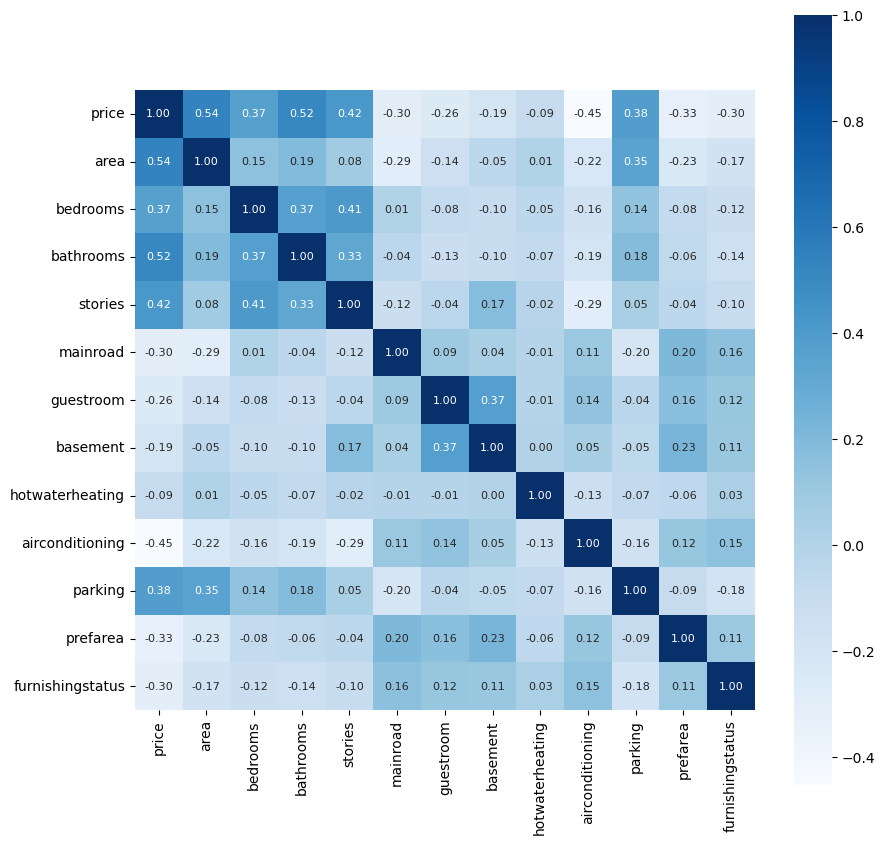

In [13]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size': 8}, cmap='Blues')

In [14]:
X = df.drop(['price'] , axis = 1)
Y = df['price']

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [16]:
model = XGBRegressor()

In [17]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [18]:
training_data_prediction = model.predict(X_train)

In [20]:
score_1 = metrics.r2_score(Y_train, training_data_prediction)
print(score_1)

0.9968795625957642


# PREDICTION SYSTEM

In [22]:
input_data = (7420,4,2,3,0,1,1,1,0,2,0,0)
#changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the np array as we are predicting for one instane
input_data_reshaped  = input_data_as_numpy_array.reshape(1,-1)

prediction  = model.predict(input_data_reshaped)
print(prediction)


[13217879.]
